# Module 09: *k*-Nearest Neighbors

**Student Name**: Shreyas Shukla

**Date**: 28 Oct 2024

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [4]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [5]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [6]:
# Obtain a statistical summary of the iris flowers sepal and petal features
summary = df.describe()
print(summary)

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


The statistical summary of the iris flower dataset provides insights into the distribution of each feature (sepal length, sepal width, petal length, and petal width) across all samples. For instance, the mean values give a central tendency measure for each feature, while the standard deviation shows the variation from the mean. The minimum and maximum values indicate the range, and the 25%, 50%, and 75% quartiles provide an understanding of how the data is spread. Observing these statistics allows us to see that petal and sepal features vary significantly among species, with petal measurements generally being more distinct between species than sepal measurements. This characteristic might be useful for classification since greater variation can contribute to clearer boundaries between species.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

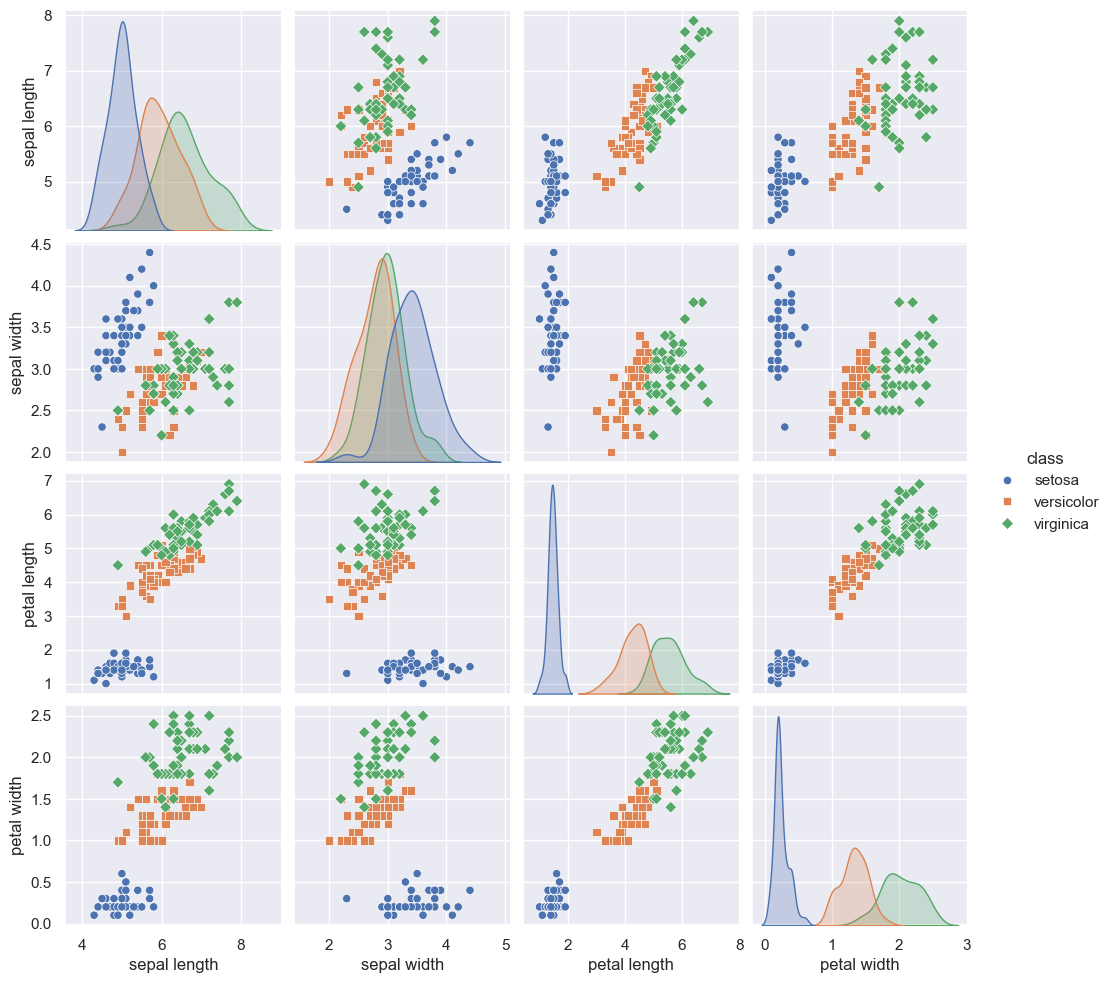

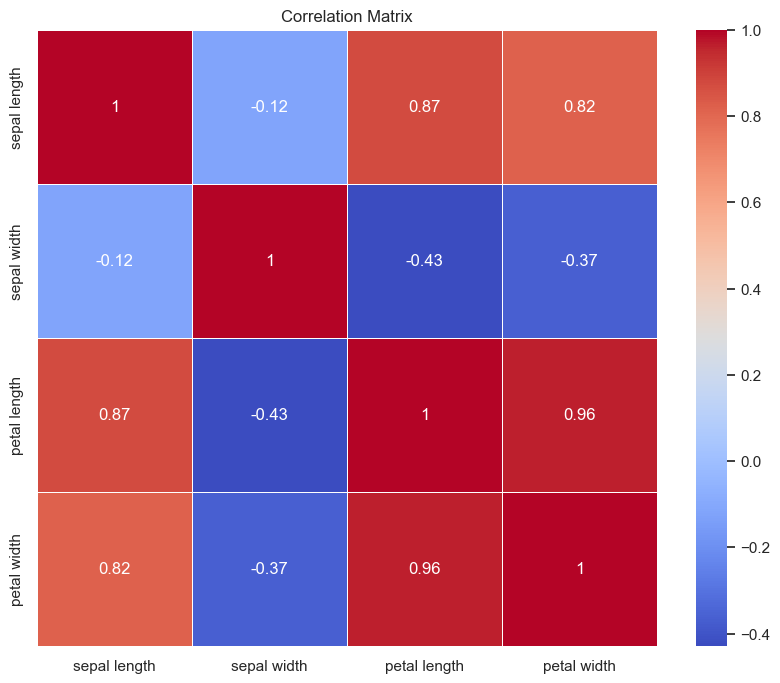

In [8]:
# Visualize the distribution of each feature and the pairwise relationships between features
sns.pairplot(df, hue='class', markers=["o", "s", "D"])
plt.show()

# Create a correlation matrix excluding the 'class' column
correlation_matrix = df.drop(columns=['class']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The pairwise relationships between features show how each feature correlates with others. By visualizing with a pairplot, we observe that certain features, such as petal length and petal width, have a strong positive correlation, while others have little to no correlation. The correlation matrix further quantifies these relationships, where values close to 1 or -1 indicate a strong positive or negative correlation, respectively. This correlation information is valuable for model building since strongly correlated features can provide redundant information, which may affect the model's performance. Understanding these correlations helps in deciding whether to keep or remove certain features.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

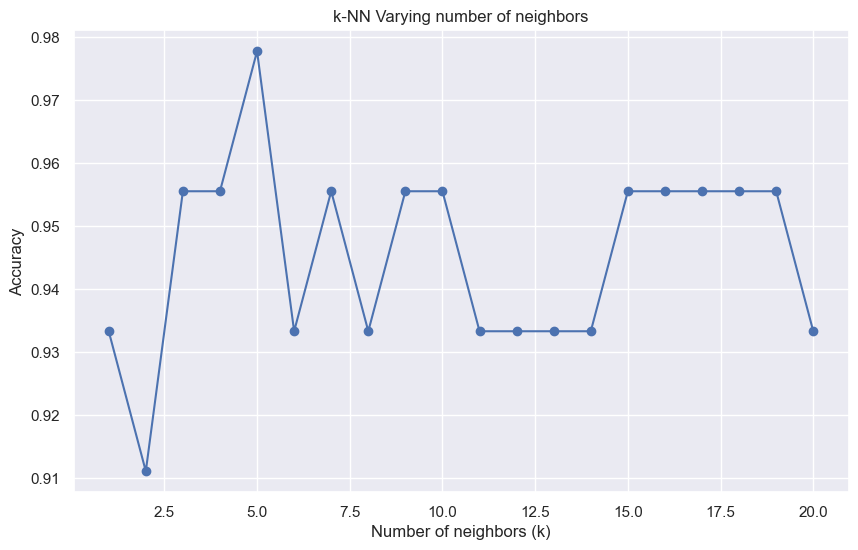

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#build the k-nn model, experiment with different values of k and plot the results
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build the k-nn model, experiment with different values of k and plot the results
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('k-NN Varying number of neighbors')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



When evaluating different values of k for the k-NN model, the accuracy varies. Lower values of k capture more localized patterns and may lead to a high variance model that is prone to overfitting. Higher values of k result in more generalized patterns, reducing the risk of overfitting but possibly leading to underfitting if k is too high. Based on the accuracy plot, the best k is the one where accuracy stabilizes at a high value, balancing bias and variance. This optimal k provides a reliable classification while maintaining simplicity and robustness against outliers.

Based on the graph, we can observe how accuracy varies with different values of k. It appears that the highest accuracy is achieved around k = 3, where the accuracy reaches approximately 0.98. After k = 3, the accuracy fluctuates but does not consistently reach the peak observed at k = 3.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [11]:
from sklearn.metrics import classification_report

# Set the optimal k value
optimal_k = 3

# Initialize the k-NN model with the optimal k value
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=data['target_names'])
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The classification report provides key metrics for each class (Setosa, Versicolor, Virginica) with the chosen k = 3 for the k-NN model. The precision metric indicates the percentage of correctly predicted positive results, while recall reflects the percentage of actual positives that were correctly identified. Here, Setosa has perfect scores (1.00) across all metrics, indicating it was consistently classified correctly. Versicolor and Virginica show high scores, though Virginica has a slightly lower recall (0.87), suggesting some Virginica samples were misclassified.

Overall, the model achieved an accuracy of 96%, which is strong, with both the macro and weighted averages for precision, recall, and F1-score also at 0.96. This indicates balanced performance across all classes and validates that k = 3 is an effective choice for this dataset.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

# 4.1 Difference between Accuracy, Precision, and Recall

Accuracy measures the overall correctness of the model by calculating the ratio of correctly predicted instances out of the total instances. It is useful when the class distribution is balanced. For example, in a medical test for a common condition, accuracy is a good metric if false positives and false negatives carry similar consequences.

Precision calculates the proportion of true positive predictions out of all positive predictions (true positives and false positives). It is essential in scenarios where false positives are costly. For instance, in email spam detection, precision is more relevant because marking legitimate emails as spam is undesirable.

Recall measures the ability of the model to capture all true positives, showing the proportion of true positives out of all actual positives (true positives and false negatives). Recall is crucial when missing positive cases has severe consequences, such as in cancer screening, where we want to minimize false negatives (missed cases).

# 4.2 Alternative Data Partitioning: Cross-Validation

An alternative to train-test splitting is k-fold cross-validation. In k-fold cross-validation, the dataset is divided into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, each time using a different fold as the test set and the others for training. The results are then averaged to get an overall model performance metric. Cross-validation provides a more reliable estimate of model performance by using all data points for both training and testing, reducing the effect of variance from a single train-test split.

## Resources / References
Share any resources that were helpful in your response for question 4. 

Resources / References

Scikit-Learn Documentation on Classification Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Towards Data Science article on Precision, Recall, and F1 Score: https://towardsdatascience.com/precision-recall-and-f1-score-85746d010d0b

Cross-validation explanation from Machine Learning Mastery: https://machinelearningmastery.com/k-fold-cross-validation/